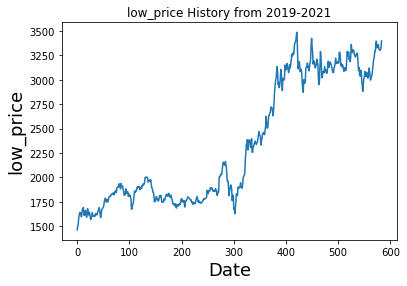

In [6]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import urllib.request
import re
import anvil.mpl_util
import sqlite3

In [7]:
import anvil.server
anvil.server.connect("L2BCBDUVFH3TVGLN5T6GUD4A-YRRXCIBEM56NA64X")

In [8]:
import anvil.media



@anvil.server.callable
def incomedata(stock, year, option):
    #create database
    connection = sqlite3.connect('stocks.db', check_same_thread=False)
    #create cursor instance
    c = connection.cursor()
    query = "SELECT year, {0} FROM annual_income_statement_".format(option)
    query = query +"{0}".format(stock)
    if year == 'All':
        c.execute(query)
        result = c.fetchall()          
    else:
        query = query + " WHERE year = {0}".format(year)
        c.execute(query)
        result = c.fetchall()    
    connection.commit()
    connection.close()
    return result

    

@anvil.server.callable
def stock_performance(stock, option):
    plt. clf()
    #create database
    graphName = '{0} History from 2019-2021'.format(option)
    connection = sqlite3.connect('stocks.db', check_same_thread=False)
    #create cursor instance
    c = connection.cursor()
    query = "SELECT date, {0} FROM market_historical_data_".format(option)
    query = query +"{0}".format(stock)
    c.execute(query)
    result = c.fetchall()          
    df = DataFrame(result,columns=['date',str(option)])
    plt.title(graphName)
    plt.xlabel('Date', fontsize=18)
    plt.ylabel(str(option), fontsize=18)
    plt.plot(df[str(option)])    
    connection.commit()
   # connection.close()
    return anvil.mpl_util.plot_image()

@anvil.server.callable
def stock_list(user_email,stock):
    connection = sqlite3.connect('stocks.db', check_same_thread=False)
    #create cursor instance
    c = connection.cursor()
    rows = [user_email,stock] 
    query = "INSERT INTO user_portfolio VALUES (?,?)"
    c.execute(query , rows)   
    connection.commit()
    
    

@anvil.server.callable
def get_stock_list(user_email):
    connection = sqlite3.connect('stocks.db', check_same_thread=False)
    #create cursor instance
    c = connection.cursor()
    query = "SELECT ticker_list FROM user_portfolio WHERE user_email = \'{0}\'".format(user_email)
    c.execute(query)   
    result = c.fetchall()
    connection.commit()
    return result


@anvil.server.callable
def news(stock):
    urls = []
    connection = sqlite3.connect('stocks.db', check_same_thread=False)
    #create cursor instance
    c = connection.cursor()
    query = "SELECT url FROM article_list WHERE comapany = \'{0}\'".format(stock)
    c.execute(query)   
    result = c.fetchall()
    connection.commit()
    return result    


@anvil.server.callable
def ratios(stock, option):
    urls = []
    connection = sqlite3.connect('stocks.db', check_same_thread=False)
    #create cursor instance
    c = connection.cursor()
    query = "SELECT {0} FROM calculated_ratios WHERE".format(option)
    query = query + " ticker = \'{0}\'".format(stock)
    c.execute(query)   
    result = c.fetchall()
    connection.commit()
    return result    


In [9]:
# user_email = 'sample@sample.com'
# connection = sqlite3.connect('stocks.db', check_same_thread=False)
# #create cursor instance
# c = connection.cursor()
# query = "SELECT url FROM article_list WHERE comapany = \'bestbuy\'"
# c.execute(query)  
# result = c.fetchall()
# connection.commit()
# print(result)
# urls = []
# for item in result:
#     urls.append(item)
#for s in urls:
    #print(s)
#print(urls)